# Курсовая

### Цель: прогнозирование успеваемости студентов

Используя набор данных “Test scores”, который содержит информацию о
студентах и их оценках на пробных выпускных тестах в школе, необходимо построить
регрессионную модель для прогнозирования итоговых оценок за экзамен.


In [1]:
# pandas — программная библиотека на языке Python для обработки и анализа данных.
# подключаем для работы с данными и их обработки 
import pandas as pd

# seaborn — это библиотека для создания статистических графиков на Python
# она основывается на matplotlib и тесно взаимодействует со структурами данных pandas
# подключаем для перевода наших данных в графическое представление
import seaborn as sns 

sns.set() # установливаем стили для графиков - seaborn

import matplotlib.pyplot as plt
import numpy as np
#это модуль Python, который предоставляет классы и функции для оценки различных статистических моделей,
#выполнения статистических тестов и изучения статистических данных
import statsmodels.api as sm

#sklearn - библиотека программного обеспечения для машинного обучения
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


import warnings # инструмент контроля предупреждений
warnings.simplefilter('ignore') # отключаем несерьезные предупреждения

%matplotlib inline

### Загружаем данные из файла

In [2]:
raw_data = pd.read_csv('TestScores.csv')
raw_data.head(100)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
95,CCAAW,Suburban,Non-public,PGK,Standard,21.0,18YOG,Male,Qualifies for reduced/free lunch,74.0,82.0
96,CCAAW,Suburban,Non-public,PGK,Standard,21.0,4YN68,Female,Qualifies for reduced/free lunch,63.0,73.0
97,CCAAW,Suburban,Non-public,PGK,Standard,21.0,905ZT,Female,Qualifies for reduced/free lunch,73.0,78.0
98,CCAAW,Suburban,Non-public,PGK,Standard,21.0,9WYVP,Male,Does not qualify,75.0,83.0


# Предварительная обработка данных

school — название школы, в которой учится учащийся

school_setting — Расположение школы 

school_type — Тип школы, государственная или частная

classroom — тип классной комнаты

teaching_method — Методы обучения: либо экспериментальные, либо стандартные

n_student — количество учеников в классе

student_id — уникальный идентификатор каждого студента

gender — Пол студента: мужской или женский

lunch — имеет ли студент право на бесплатный / субсидированный обед или нет

pretest — оценка за предварительный тест из 100

posttest — оценка за итоговый тест из 100, целевая переменная

В искомом наборе данных можно утверждать что student_id никак не повлияет на искомые данные, также можно предположить о том что school_setting, school_type и lunch не вляют на успеваемость учеников на прямую, но можно предположить что lunch, говорит о том, что студент попадает в тот процент людей, у которых есть льготы, обычно это люди с низким достатком или с какими-то иными жизненными проблемами, которые вынуждают государство/заведение помогамть таким людям льготными обедами, что также дает предположение о том, что студенты с льготами могут иметь потенциально ниже оценки, т.к. имеют специфические обстоятельства в своей жизни. Также school_setting может говорить о том находится ли школа в "благополучном" районе или нет, что также может влять на исследуемые показатели успеваемости. school_type - говорит о типе школы, государственная или частная, как правило частные школы делают сильный упор на подборе персонала и состовлении процесса обучения, иногда имеют больше возможностей относительно состовления учебного плана, также частные школы, как правило, платные и стоят не малых денег, что косвенно намекает на то, что в них ходят дети из благополучных семей, которые чаще нацелены на получение от учебных заведений максимума => частные школы имеют средную оценку выше, относительно, государственных.



### Выведем на экран статистическую сводку.

In [3]:
raw_data.describe(include='all')

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
count,2133,2133,2133,2133,2133,2133.000000,2133,2133,2133,2133.000000,2133.000000
unique,23,3,2,97,2,NaN,2133,2,2,NaN,NaN
top,GOOBU,Urban,Public,18K,Standard,NaN,2FHT3,Male,Does not qualify,NaN,NaN
freq,158,906,1582,31,1373,NaN,1,1077,1215,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.796531,NaN,NaN,NaN,54.955931,67.102203
std,NaN,NaN,NaN,NaN,NaN,4.228893,NaN,NaN,NaN,13.563101,13.986789
min,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,22.000000,32.000000
25%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,44.000000,56.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,56.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,65.000000,77.000000


По данной сводкеdescribe можно сделать вывод, что слишком большое количество уникальных значений сожержат столбцы:classroom и student_id. Также видим, что уникальных значений поля classroom - 97, что может говорить о том, что данный параметр является своеобразным "id" для класса, в следствии чего его можно удалять. 

Таким образом следует удалить только student_id и classroom.
Стоит заметить, что значение freq равное 31 соответсвует максимальному количеству студентов из столбца n_student (max = 31). На основе этого можно предположить, что это номер класса или классной комнаты.

#### Выполним построение матрицы коррелирующих значений.

Значение коэффициента может быть в диапазоне от -1 до 1. Значение, близкое к 1, означает положительную корреляцию между двумя переменными (то есть, когда одна переменная увеличивается, другая тоже увеличивается), значение, близкое к -1, означает отрицательную корреляцию (то есть, когда одна переменная увеличивается, другая уменьшается), а значение, близкое к 0, означает отсутствие корреляции.

In [4]:
corr_matrix = raw_data.corr()
corr_matrix

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


In [5]:
#corr = raw_data.corr().loc['pretest', 'posttest']
#corr

In [6]:
from scipy.stats.stats import pearsonr
pearsonr(raw_data['posttest'], raw_data['pretest'])

PearsonRResult(statistic=0.9508842857175768, pvalue=0.0)

In [7]:
#np.corrcoef(raw_data['posttest'], raw_data['pretest'])

В данном случае результат функции pearsonr показывает, что между 'posttest' и 'pretest' есть высокая положительная корреляция (значение коэффициента корреляции Пирсона близко к 1), и p-значение равно 0.0, что говорит о том, что корреляция является статистически значимой.

In [8]:
pearsonr(raw_data['n_student'], raw_data['posttest'])

PearsonRResult(statistic=-0.5048864411228164, pvalue=2.3551556423615266e-138)

В данном случае, результат вычислений pearsonr состоит из двух чисел. Первое число - это значение коэффициента корреляции Пирсона между переменными n_student и posttest. Значение -0.50 указывает на отрицательную корреляцию между количеством студентов в классе и оценкой за экзамен. Это означает, что чем больше количество студентов, тем меньше оценка за экзамен.

Второе число - это p-значение (p-value) теста на значимость корреляции. Оно используется для определения статистической значимости коэффициента корреляции. Значение p-value очень маленькое (2.36e-138), что указывает на то, что нулевая гипотеза о том, что коэффициент корреляции равен нулю, может быть отвергнута с очень высокой уверенностью. То есть, отрицательная корреляция между количеством студентов и оценкой за экзамен является статистически значимой.

Для более корректного корреляционного анализа воспользуемся heatmap, для этого необходимо избавится от переменных не числового типа, для этого выполним следующее преобразрвание:

school_setting - -1(Rural), 0(Suburban), 1(Urban);

school_type - 0(Public), 1(Non-public);

teaching_method - 0(Standard), 1(Experimental);

gender - 0(Male), 1(Female);

lunch - 0(Qualifies for reduced/free lunch), 1(Does not qualify);

также удалим столбец с названием школы, id класса и id студента.

In [9]:
data = raw_data.copy()
data['school_setting'] = data['school_setting'].replace({'Urban': '1', 'Suburban': '0', 'Rural': '-1'})
data['school_type'] = data['school_type'].replace({'Public': '0', 'Non-public': '1'})
data['teaching_method'] = data['teaching_method'].replace({'Standard': '0', 'Experimental': '1'})
data['gender'] = data['gender'].replace({'Female': '1', 'Male': '0'})
data['lunch'] = data['lunch'].replace({'Does not qualify': '1', 'Qualifies for reduced/free lunch': '0'})
data = data.drop(columns=['student_id', 'classroom', 'school'],axis=1)
data

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,1,1,0,20.0,1,1,62.0,72.0
1,1,1,0,20.0,1,1,66.0,79.0
2,1,1,0,20.0,0,1,64.0,76.0
3,1,1,0,20.0,1,1,61.0,77.0
4,1,1,0,20.0,0,1,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,1,0,0,30.0,1,1,39.0,55.0
2129,1,0,0,30.0,1,0,38.0,46.0
2130,1,0,0,30.0,1,0,45.0,51.0
2131,1,0,0,30.0,0,0,46.0,53.0


Проверим датасет, после удаления не нужных строк, на пропуски в оставшихся данных

In [10]:
data.isnull().sum() 

school_setting     0
school_type        0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

Видно, что пустых значений в данных нет.
Теперь проверим типы значений в имеющихся данных.

In [11]:
data.dtypes

school_setting      object
school_type         object
teaching_method     object
n_student          float64
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

Т.к. некоторые данные по прежнему определяются как "object" преобразуем их в "int"

In [12]:
data['school_setting'] = (data['school_setting'].astype(int)) #преобразуем в int
data['school_type'] = (data['school_type'].astype(int)) #преобразуем в int
data['teaching_method'] = (data['teaching_method'].astype(int)) #преобразуем в int
data['gender'] = (data['gender'].astype(int)) #преобразуем в int
data['lunch'] = (data['lunch'].astype(int)) #преобразуем в int
data['pretest'] = (data['pretest'].astype(int)) #преобразуем в int
data['posttest'] = (data['posttest'].astype(int)) #преобразуем в int
data['n_student'] = (data['n_student'].astype(int)) #преобразуем в int

In [13]:
data.dtypes

school_setting     int32
school_type        int32
teaching_method    int32
n_student          int32
gender             int32
lunch              int32
pretest            int32
posttest           int32
dtype: object

В результате получили набор данных с корректными типами данных, выполним корреляционный анализ с помощью метода 'corr' и с помощью 'heatmap' представим графическую интерпретацию полученных данных.

In [14]:
corr_matrix = data.corr()
corr_matrix

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
school_setting,1.000000,0.083307,-0.082795,0.508018,0.036581,-0.025744,-0.123575,-0.139226
school_type,0.083307,1.000000,0.153593,-0.548190,0.017593,0.171196,0.361158,0.373916
teaching_method,-0.082795,0.153593,1.000000,-0.105900,-0.020087,0.017970,0.115185,0.312884
n_student,0.508018,-0.548190,-0.105900,1.000000,0.019265,-0.367018,-0.499253,-0.504886
gender,0.036581,0.017593,-0.020087,0.019265,1.000000,-0.016134,-0.006048,-0.006902
lunch,-0.025744,0.171196,0.017970,-0.367018,-0.016134,1.000000,0.622420,0.598371
pretest,-0.123575,0.361158,0.115185,-0.499253,-0.006048,0.622420,1.000000,0.950884
posttest,-0.139226,0.373916,0.312884,-0.504886,-0.006902,0.598371,0.950884,1.000000


<AxesSubplot:>

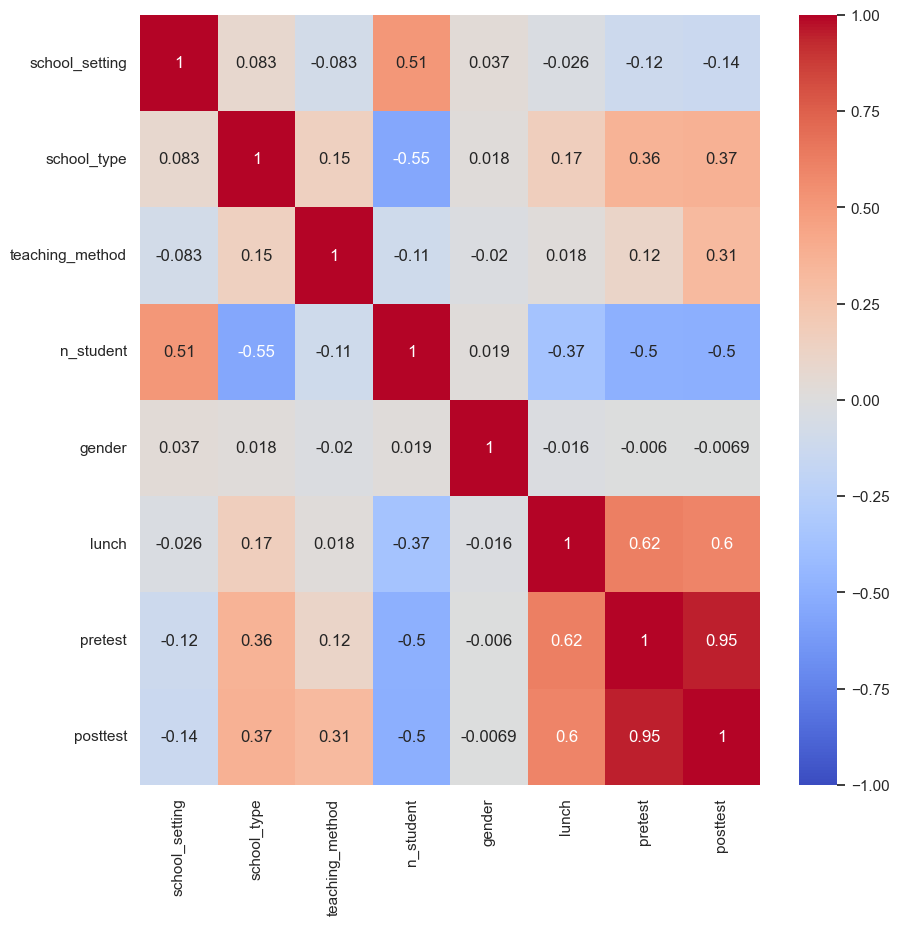

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', ax=ax)

#### Вывод:

Можно заметить, что меньше всего на значение post_test влияет характеристика гендера. Также отметим, что на результ экзамена негативнее всего влияет количество студентов в классе, а позитивнее всего влияет результат оценки за предэкзаменационных тест.

#### Займемся поиском аномалий и выбросов в наших данных.

Для визуализации распределения метрических переменных воспользуемся функцией displot.

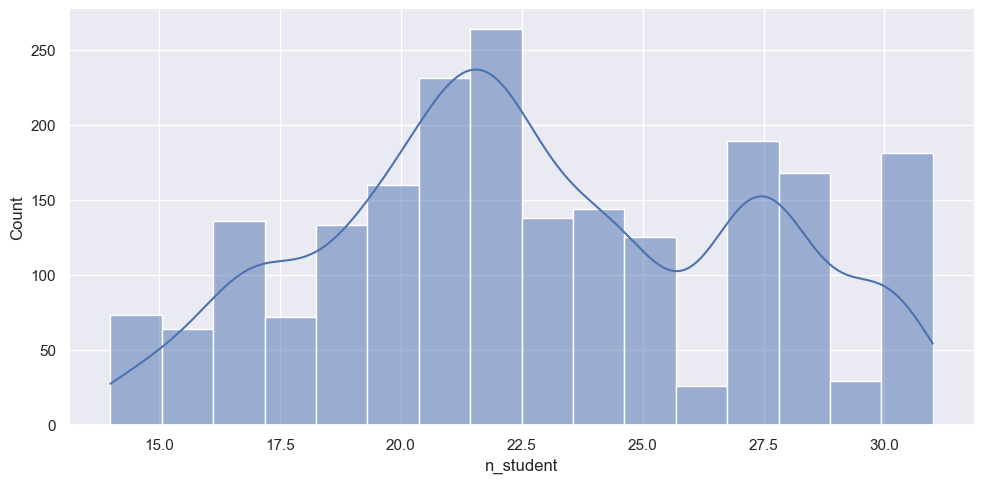

In [16]:
sns.displot(data['n_student'],kde=True,
    height=5,
    aspect=2)

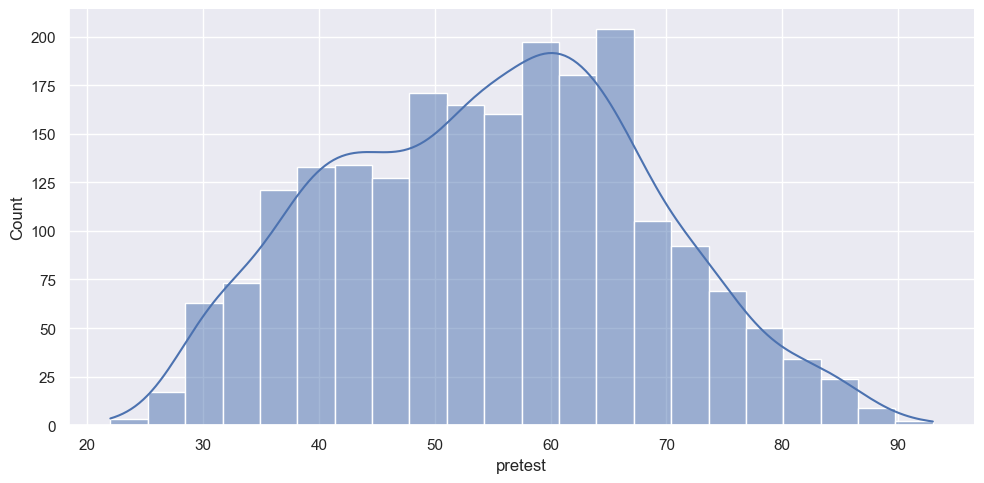

In [17]:
sns.displot(data['pretest'],kde=True,
    height=5,
    aspect=2)

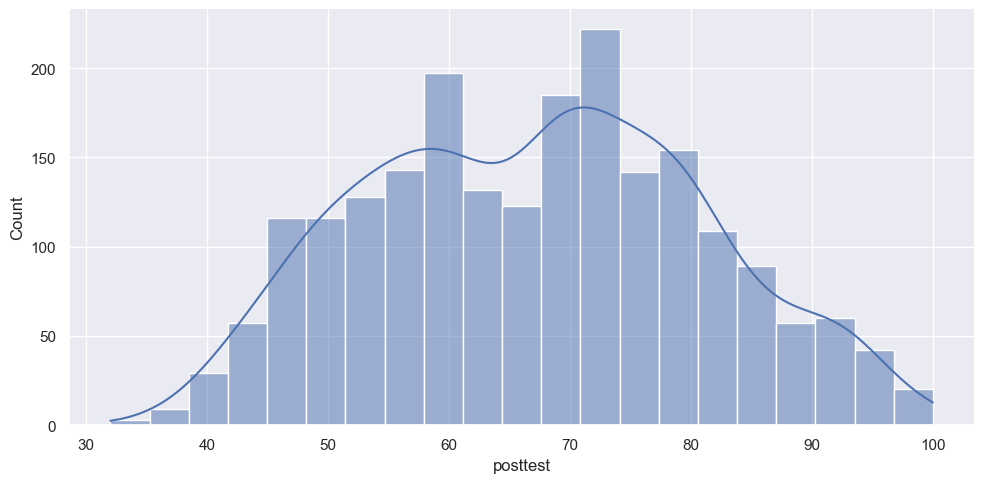

In [18]:
sns.displot(data['posttest'],kde=True,
    height=5,
    aspect=2)

Исходя из графиков представленных выше, можно утверждать что данные представленны без каких-либо ярко выраженных выбросов или аномалий.

Т.к. пропусков и аномалий нет, проведем небольшой анализ данных относительно зависимости средней оценки за выпускной экзамен с данными, которые не на прямую влияют на итоговые результаты, обозначенные в абзаце выше.

Посмотрим как зависит оценка ученика от расположения школы.

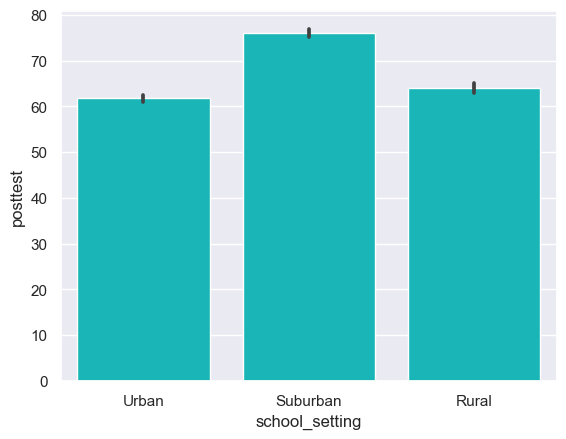

In [19]:
sns.barplot('school_setting', 'posttest', data = raw_data, color="darkturquoise")
plt.show()

Исходя из графика выше, можно сделать вывод о том, что средний балл выпускника городской школы будет ниже чем средние баллы выпускников пригородных и загородных(сельских?) школ. Возможно это связано с тем что в городах чаще встречаются государственные школы, когда в пригородах частные(?), также можно предположить что в загородных школах меньше учеников, что позволяет сохранить средний балл чуть выше, чем у городских, для проверки наших утверждений можем построить аналогичное графическое представление для характеристики school_type, для чего необходимо заменить строковые значения на 1 - государственная и 0 - частная, что мы уже проделали в пункте выше, для проведения корреляционного анализа.

In [20]:
unique_values = raw_data['school_type'].unique()

print(unique_values)

['Non-public' 'Public']


Исходные данные:

In [21]:
raw_data

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


Обработанные данные:

In [22]:
data

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,1,1,0,20,1,1,62,72
1,1,1,0,20,1,1,66,79
2,1,1,0,20,0,1,64,76
3,1,1,0,20,1,1,61,77
4,1,1,0,20,0,1,64,76
...,...,...,...,...,...,...,...,...
2128,1,0,0,30,1,1,39,55
2129,1,0,0,30,1,0,38,46
2130,1,0,0,30,1,0,45,51
2131,1,0,0,30,0,0,46,53


Исходя из данных полученных из метода "describe", использованого ранее, мы имеем 23 уникальных значения id(названий/кодов) школ в нашем наборе данных, следовательно можем узнать соотношение количества школ в той или иной местности.

In [23]:
unique_values = raw_data['school'].unique()
print(unique_values)
df_filtered = raw_data.drop_duplicates(subset=['school'])
df_filtered['school_type'] = df_filtered['school_type'].replace({'Public': '0', 'Non-public': '1'})
df_filtered['school_type'] = (df_filtered['school_type'].astype(int)) #преобразуем в int
df_filtered.head(5)

['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,1,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
41,CCAAW,Suburban,1,2B1,Experimental,18.0,1IALS,Female,Does not qualify,61.0,75.0
150,CIMBB,Urban,1,A33,Standard,19.0,0WW6N,Male,Does not qualify,60.0,67.0
224,CUQAM,Urban,0,1Q1,Standard,28.0,14K8S,Female,Does not qualify,55.0,70.0
331,DNQDD,Suburban,0,2AP,Standard,27.0,1K0Q5,Female,Does not qualify,54.0,67.0


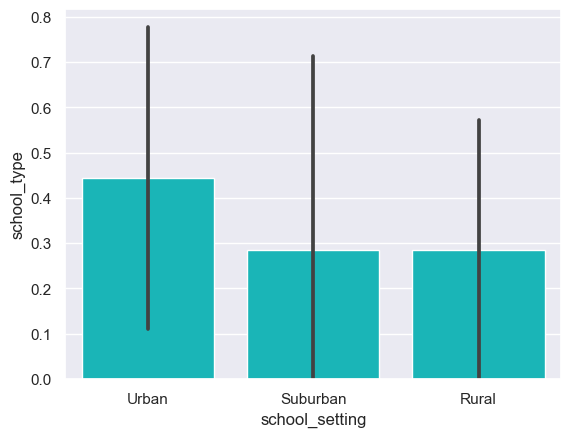

In [24]:
sns.barplot('school_setting', 'school_type', data = df_filtered, color="darkturquoise")
plt.show()

Судя по графику, выдвинутое выше предположение может является истинным относительно исследуемых данных, исходя из графика, можно утверждать что пригородные и загородные государственные учебные завидения являются менее распространнеными для исходных данных.

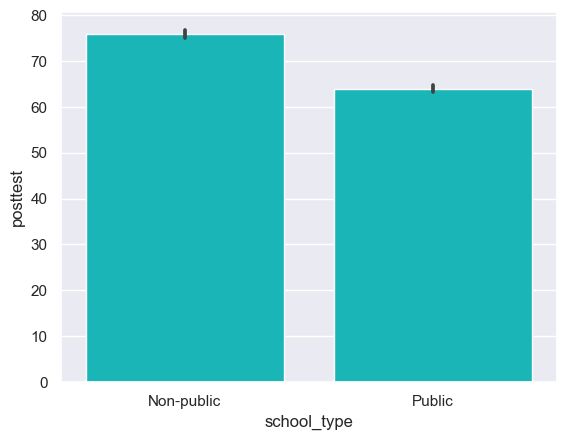

In [25]:
sns.barplot('school_type', 'posttest', data = raw_data, color="darkturquoise")
plt.show()

Предположение выше, о том, что средний балл выпускников частных школ выше, чем у учеников государственных заведений было верно, что можно видеть из графика выше.

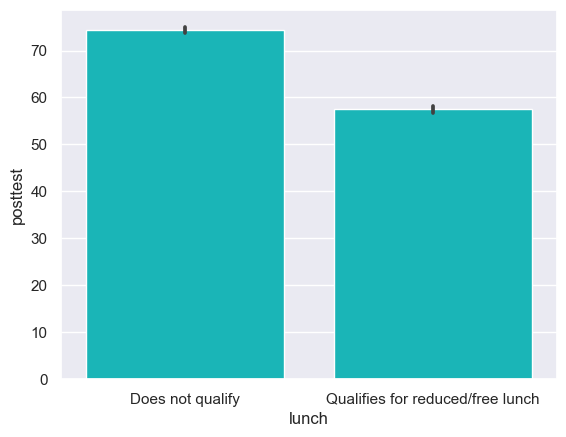

In [26]:
sns.barplot('lunch', 'posttest', data = raw_data, color="darkturquoise")
plt.show()

Также предположени о том, что студенты, получающие льготную помощь показывают в учёбе себя хуже также оказалось верным.

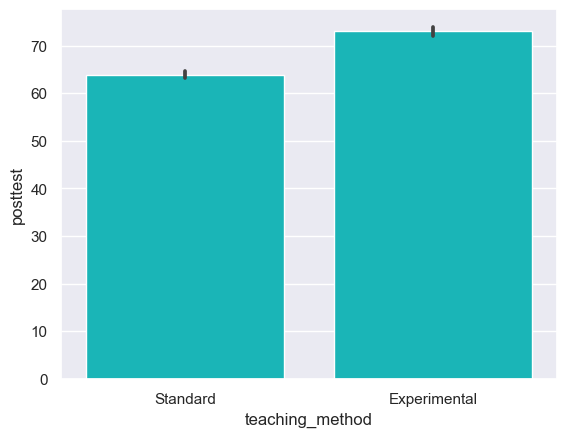

In [27]:
sns.barplot('teaching_method', 'posttest', data = raw_data, color="darkturquoise")
plt.show()

Также видим что эксперементальные методы обучения позитивнее влияют на успешность прохождения экзаменационных заданий.

#### Вывод:
В результате первичной обработки даннхы мы избавились от неинтересующих нас столбцов данных, проверили наши данные на пустые данные, провели проверку на наличие аномальных данных. В результате данного анализа мы обнаружили, что в исходных данных нет пропущенных/пустых данных, данные похеже на те, в которых нет ярко выраженных аномальных данных. Таким образом полученные данные можно использовать в работе на следующих этапах нашей работы.

# Построение регрессии 

Выделим независимые переменные и целевую переменную

Т.к. для построения регрессионной модели нам требуется использовать числовые интерпритации характеристик, то воспользуемся тем набором данных - data, полученным для проведения корреляционного анализа, т.к. он уже преобразовам подходящим нам образом.

In [28]:
targets = data['posttest'] #Целевая переменная
inputs = data.drop('posttest',axis = 1) # Независимые переменные

In [29]:
inputs

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
0,1,1,0,20,1,1,62
1,1,1,0,20,1,1,66
2,1,1,0,20,0,1,64
3,1,1,0,20,1,1,61
4,1,1,0,20,0,1,64
...,...,...,...,...,...,...,...
2128,1,0,0,30,1,1,39
2129,1,0,0,30,1,0,38
2130,1,0,0,30,1,0,45
2131,1,0,0,30,0,0,46


In [30]:
targets

0       72
1       79
2       76
3       77
4       76
        ..
2128    55
2129    46
2130    51
2131    53
2132    48
Name: posttest, Length: 2133, dtype: int32

### Создаём модель 

Линейная регрессия является методом моделирования зависимости между одной непрерывной зависимой переменной (целевой переменной) и одной или несколькими независимыми переменными (факторами), которые могут быть как непрерывными, так и категориальными, т.к. это соответсвует поставленной перед нами задаче, то будем выполнять исследование используя линейную регрессию.

Инициализируем линенйную регрессию и подставляем туда тренировочные данные

Берем следующее соотношение данных - тестовый набор данных = 1/3, тренировной набор данных = 2/3

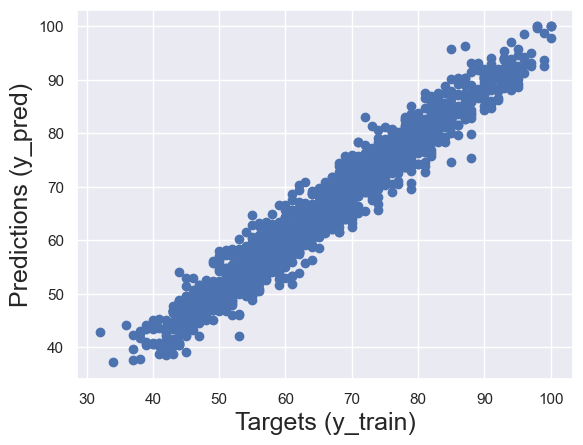

In [31]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.33, random_state = 42)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
y_pred = np.clip(y_pred, 0, 100)#вводим ограничения на возможные значения прогнозируемых даннхы в диапазоне [0,100]
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)',size = 18)
plt.ylabel('Predictions (y_pred)',size = 18)
plt.show()


Облако точек выстроено в линию 45 градуссов и имеет минимальное рассеивание, значит у нас получился хороший прогноз 

Построим график распредления остатков

Text(0.5, 1.0, 'Residuals PDF')

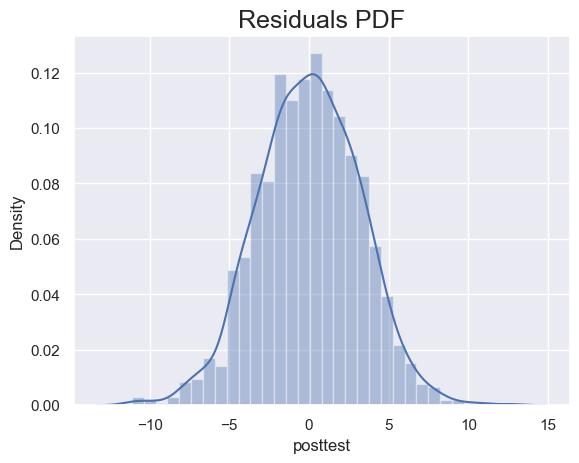

In [32]:
sns.distplot(y_train - y_pred)
plt.title("Residuals PDF", size = 18)

 R² - мера, которая измеряет, насколько хорошо линейная модель соответствует данным и выражает долю вариации зависимой переменной, которая может быть объяснена независимыми переменными в модели.

#### Вывод:
В нашем случае вычисляем R² для тренировочных данных, что позволяет оценить, насколько хорошо модель подходит для тренировочных данных. Т.к. R² близко к 1 (~0.95), это означает, что модель очень хорошо подходит для наших данных.

In [33]:
reg.score(x_train, y_train)

0.9471187589851566

### Находим значение весов

В линейной регрессии, обученная модель представляет собой уравнение вида:

y = w0 + w1x1 + w2x2 + ... + wn*xn

где y - зависимая переменная, x1, x2, ..., xn - независимые переменные, w0 - свободный коэффициент (intercept), а w1, w2, ..., wn - коэффициенты, соответствующие каждой независимой переменной.

Коэффициенты модели, которые находятся перед каждой независимой переменной, представляют собой вектор w = (w1, w2, ..., wn), который может быть получен из атрибута coef_ обученной модели. Атрибут intercept_ представляет свободный коэффициент w0.

Найдем w0 и w.

In [34]:
reg.intercept_

15.4177949394429

In [35]:
reg.coef_

array([ 0.03486995, -0.20594485,  6.00490921, -0.0899723 ,  0.18208494,
        0.54110398,  0.93180471])

Т.к значения весов в линейной регрессии позволяют определить, как каждая из независимых переменных влияет на зависимую переменную и каким образом можно использовать эти взаимосвязи для прогнозирования значений зависимой переменной на новых данных, найдем значения w для каждой независимой переменной.

Создадим сводку весов и переменных.

In [36]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,school_setting,0.034870
1,school_type,-0.205945
2,teaching_method,6.004909
3,n_student,-0.089972
4,gender,0.182085
5,lunch,0.541104
6,pretest,0.931805


Посмотрим прогноз для тестовых данных.

Сравниваем тестовые фактические значения с тестовыми значениями прогнозов.

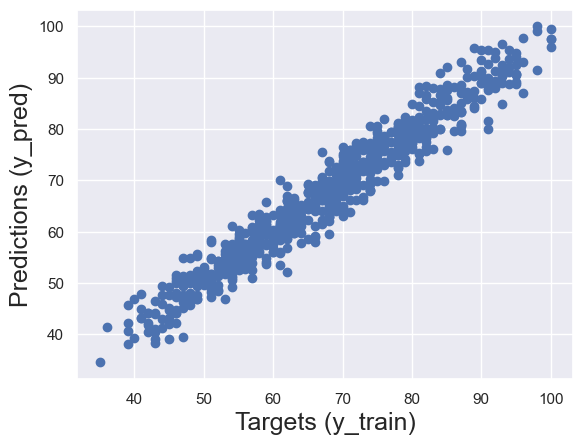

In [37]:
y_pred_test = reg.predict(x_test)
y_pred_test = np.clip(y_pred_test, 0, 100)#вводим ограничения на возможные значения прогнозируемых даннхы в диапазоне [0,100]
plt.scatter(y_test, y_pred_test)
plt.xlabel('Targets (y_train)',size = 18)
plt.ylabel('Predictions (y_pred)',size = 18)
plt.show()

#### Вывод:
Облако точек похоже на линию в 45 градуссов, значит прогноз хороший. Рассеивание минимально.

Т.к. R² близко к 1 (~0.95), это означает, что модель построена хорошо.

In [38]:
reg.score(x_test, y_test)

0.946784710892591

## Метод кросс-валидации

Кросс-валидация (cross-validation) - это метод оценки качества модели, который позволяет оценить обобщающую способность модели на независимых данных.

Выполним вычисление среднего значения оценок кросс-валидации (R²) используемой для оценки обобщающей способности модели на новых, независимых данных.

Т.к. R² равно ~0.87, то это означает, что модель имеет хорошую обобщающую способность и может хорошо работать на новых, независимых данных.

In [39]:
scores = cross_val_score(reg, inputs, targets, cv = 10)
cv_scrore = scores.mean()
cv_scrore

0.8707234687224614

Выведем предсказанные значения

In [40]:
df_pf = pd.DataFrame(y_pred_test, columns = ['Prediction'])
df_pf.head()

,Prediction
0,62.860194
1,85.120775
2,72.195454
3,61.105519
4,62.591147


Сравним фактические результаты с спрогнозированными

In [41]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = y_test
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)
df_pf.head(10)

,Prediction,Target,Residual,Difference%
0,62.860194,68,5.139806,7.558538
1,85.120775,87,1.879225,2.160029
2,72.195454,70,-2.195454,3.136362
3,61.105519,61,-0.105519,0.172982
4,62.591147,63,0.408853,0.648972
5,69.564912,68,-1.564912,2.301341
6,57.144483,55,-2.144483,3.899060
7,90.387495,89,-1.387495,1.558983
8,90.957660,84,-6.957660,8.282929
9,61.178670,66,4.821330,7.305046


Выведем на экран статистическую сводку

In [42]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,704.000000,704.000000,704.000000,704.000000
mean,67.287796,67.399148,0.111352,3.943745
std,13.719054,14.147307,3.259842,3.201900
min,34.547034,35.000000,-9.067736,0.007754
25%,56.550302,56.000000,-2.140887,1.355802
50%,67.531343,68.000000,0.046004,3.225473
75%,77.244292,78.000000,2.256931,5.535353
max,100.000000,100.000000,10.978330,17.386517


В среднем процент ошибки составляет ~4 из чего множно сделать вывод построенная многомерная линейная регрессия хорошо подходит для прогнозирования оценок за экзаменационный тест. Но т.к. максимальное значение ошибки ~17.4% посмотрим как много значений выходят за ошибку ~5,55%

In [43]:
df_pf_high_diff = df_pf.loc[df_pf['Difference%'] > 5.55]
df_pf_high_diff

,Prediction,Target,Residual,Difference%
0,62.860194,68,5.139806,7.558538
8,90.957660,84,-6.957660,8.282929
9,61.178670,66,4.821330,7.305046
13,80.598514,75,-5.598514,7.464686
17,58.310105,51,-7.310105,14.333539
...,...,...,...,...
693,50.025684,46,-4.025684,8.751488
694,86.984384,96,9.015616,9.391266
696,47.770104,44,-3.770104,8.568418
698,58.074148,66,7.925852,12.008867


In [44]:
df_pf_high_diff = df_pf.loc[df_pf['Difference%'] > 10]
df_pf_high_diff.describe()

,Prediction,Target,Residual,Difference%
count,34.000000,34.000000,34.000000,34.000000
mean,56.859575,56.441176,-0.418398,12.951857
std,11.247453,13.924452,7.374100,2.223704
min,38.274253,36.000000,-9.067736,10.165789
25%,49.763825,46.250000,-6.851685,11.029269
50%,55.461274,53.500000,-5.452849,12.271869
75%,62.748710,65.000000,7.182510,14.453330
max,81.485669,91.000000,10.978330,17.386517
